Démarche de Travail :

1. Définir un objectif mesurable :

    Objectif : Prédir si une personne est infectée         en fonction des données cliniques disponibles.
     
    Métrique : F1 : 50% et Recall : 70%
    
    
2. EDA (Exploratory Data Analysis) (27/30)

    Analyse de la forme :
    
        Identification de la target SARS-Cov-2 exam result
        
        Nombre de lignes et de colonnes (5644, 111)
        
        Types de variables float64 : 70
                           object  : 37
                           int64   :  4
        
        identification des valeurs manquantes
        beaucoup de NaN (moitié des variables > 90% de         NaN).
        2 groupes de données 76% test viral ; 89% taux         sanguins.
        
    Analyse de fond :
    
        Visualisation de la target: 10% de positifs
        
        Compréhension des différentes variables (net)
        
        * variables contiues standardisées (centrées en 0 et std=1), skewed(asymetrie), test sanguin.
        
        * age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, ..
        
        * variable quantitative : binaire (0,1), Rhinovirus semble trés élevée
        
        Visualisation des relations features - target
        (Hist - Boxplot) : 
        
        target/blood : les taux de moncytes, leucocytes et platelets semblent liés au covid-19. hypothese à tester.
        
        target/age : les individus de faible age sont trés peu contaminé? 
        
        target/viral : les doubles maladies sont trés rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? à tester.
        Identification des outliers
        
Conclusions initiales

*beaucoup de données manquantes (au mieux on garde 20 % du dataset). 2 groupes de données intéressantes (viral, sanguin). Presque pas de variable 'discriminante' pour distinguer les cas + et -, ce qui permet de dire qu'il n'est pas vraiment approprié de vouloir prédir si un individu est atteint du covid-19 en se basant sur ces simples tests sanguins.
Des variables intéressantes (monocytes, ..)


3. Pre-processing (28/30)

Objectif : transformer le data pour le mettre dans un format propice au ML.

checklist de base (non exhaustive)

    création du Train set / Test set
    
    élimination des NaN : dropna(), imputation, ...
    
    encodage
    
    suppression des outliers néfastes au modèle

    feature selection
    
    feature engineering
    
    feature scaling
    
4. Modelling (29/30)

Objectif : développer un modèle de ML qui reponde à l'objectif final.

checkliste de base 

    définir une fonction d'évaluation
    
    entrainement de différents modèles
    
    optimisation avec GridSearchCV
    
    (optionnel) analyse des erreurs et retour au            preprocessing / EDA
    
    learning curve et prise de décision.

    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',111)

In [3]:
data = pd.read_excel(r'C:\Users\Administrateur\Downloads\dataset.xlsx')

In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [5]:
df = data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [8]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:>

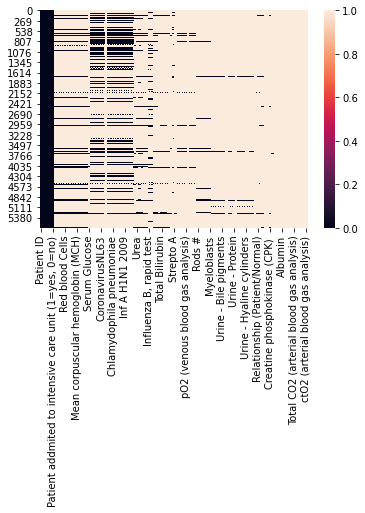

In [9]:
sns.heatmap(df.isna())

<AxesSubplot:>

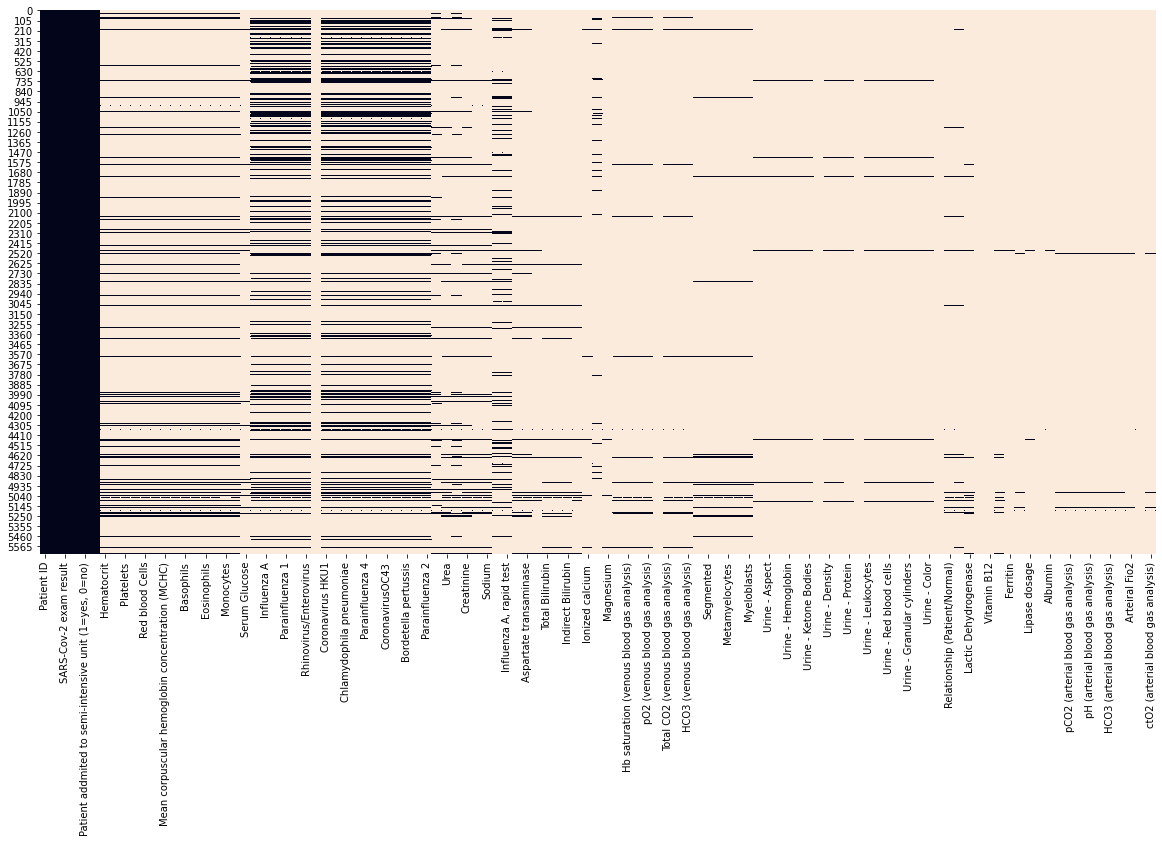

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
df.isna().sum()/df.shape[0] # % des NaN

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [12]:
(df.isna().sum()/df.shape[0]).sort_values() # % triés

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [13]:
# elimination des colonnes inutiles

df = df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

<AxesSubplot:>

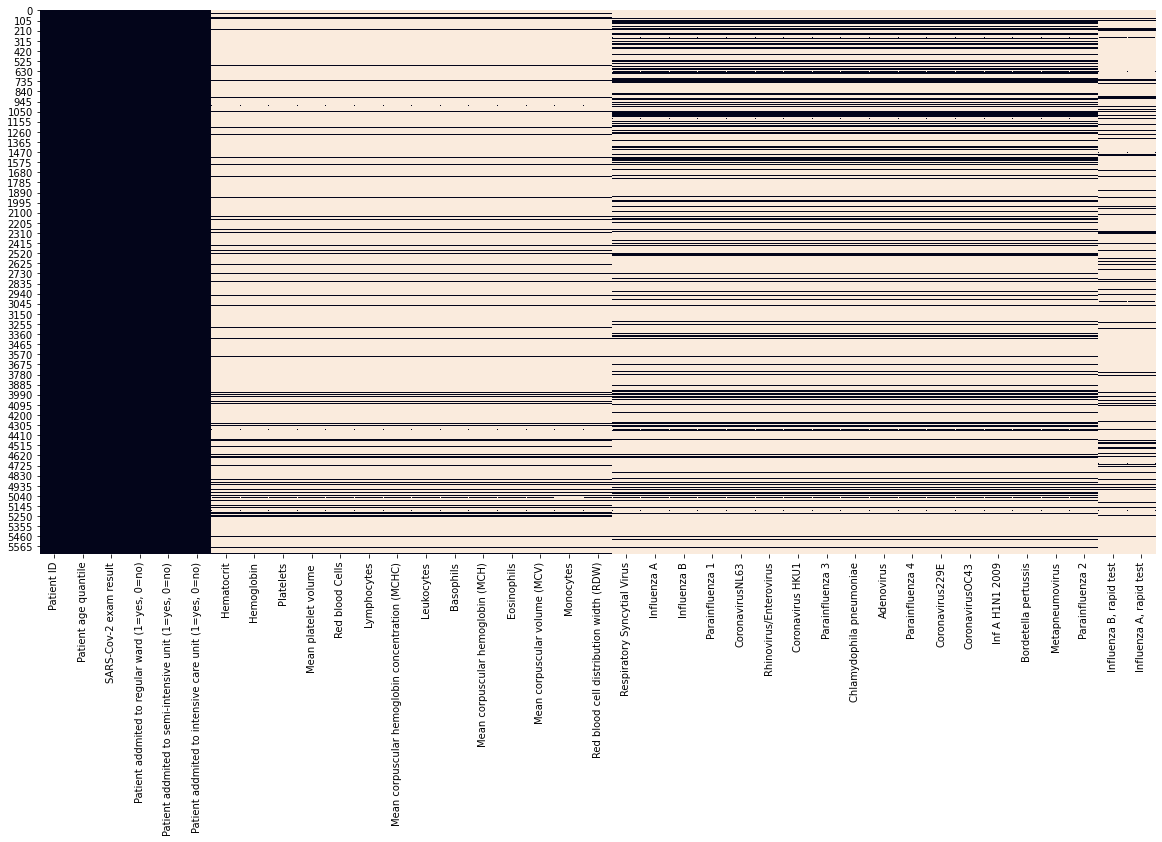

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [15]:
df = df.drop('Patient ID', axis=1)

In [16]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

     Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0           NaN              NaN              NaN              NaN   
1  not_detected     not_detected     not_detected     not_detected   
2           NaN              NaN              NaN              NaN   
3           NaN              NaN              NaN              NaN   
4  not_detected     not_detected     not_detected     not_detected   

   Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0              NaN                   NaN              NaN              NaN   
1     not_detected          not_detected     not_detected     not_detected   
2              NaN                   NaN              NaN              NaN   
3              NaN                   NaN              NaN              NaN   
4     not_detected          not_detected     not_detected     not_detected   

   Influenza B, rapid test Influenza A, rapid test  
0                      NaN                     NaN  
1                 negative                negative  
2                      NaN                     NaN  
3                      NaN                     NaN  
4                      NaN                     NaN  

[5 rows x 38 columns]

In [17]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [18]:
for col in df.select_dtypes('float'):
    print(col)

Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

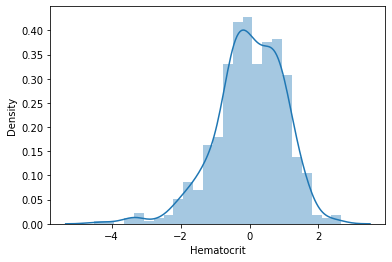

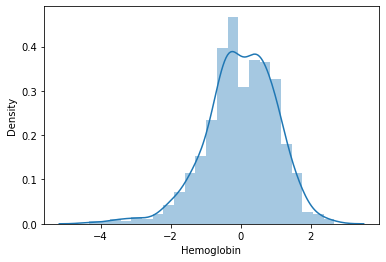

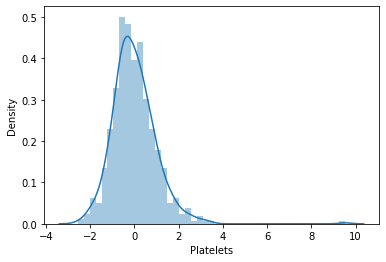

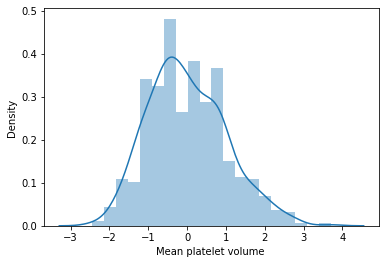

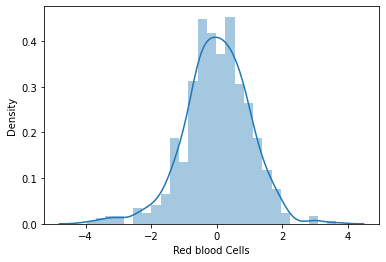

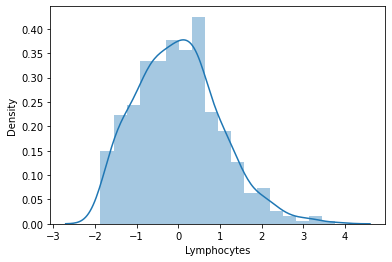

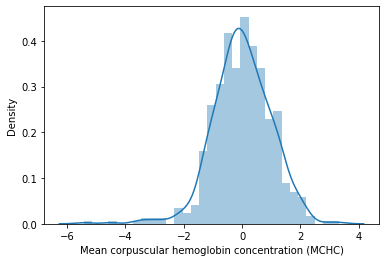

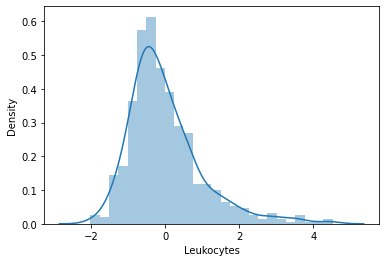

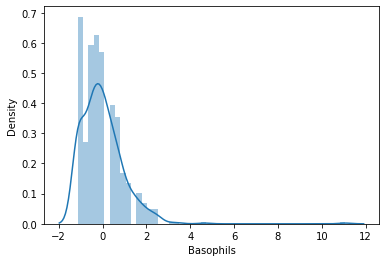

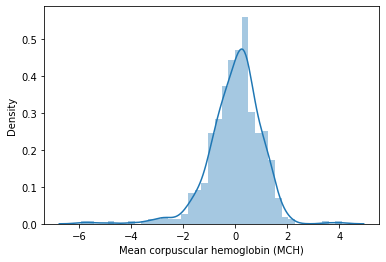

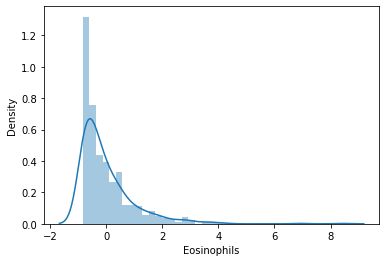

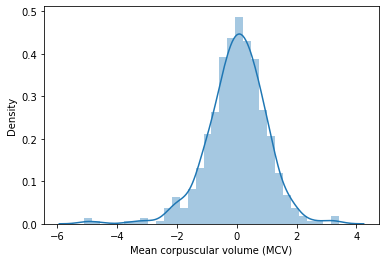

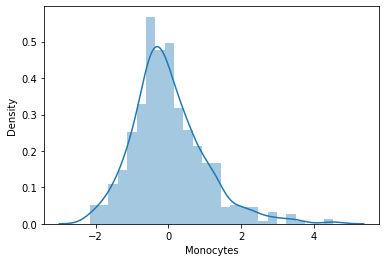

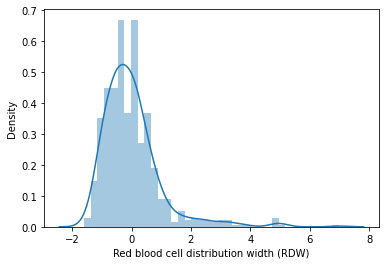

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

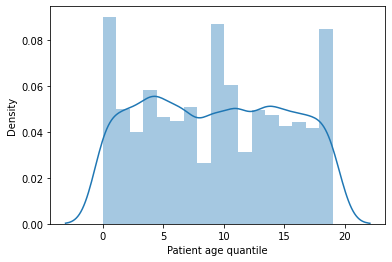

In [20]:
sns.distplot(df['Patient age quantile'])

In [21]:
# variables qualitatives

df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [22]:
for col in df.select_dtypes('object'):
    print(col, df[col].unique())

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


In [23]:
for col in df.select_dtypes('object'):
    print(f'{col:-<25} {df[col].unique()}') # marge

SARS-Cov-2 exam result--- ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A-------------- [nan 'not_detected' 'detected']
Influenza B-------------- [nan 'not_detected' 'detected']
Parainfluenza 1---------- [nan 'not_detected' 'detected']
CoronavirusNL63---------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus--- [nan 'detected' 'not_detected']
Coronavirus HKU1--------- [nan 'not_detected' 'detected']
Parainfluenza 3---------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae- [nan 'not_detected' 'detected']
Adenovirus--------------- [nan 'not_detected' 'detected']
Parainfluenza 4---------- [nan 'not_detected' 'detected']
Coronavirus229E---------- [nan 'not_detected' 'detected']
CoronavirusOC43---------- [nan 'not_detected' 'detected']
Inf A H1N1 2009---------- [nan 'not_detected' 'detected']
Bordetella pertussis----- [nan 'not_detected' 'detected']
Metapneumovirus---------- [nan 'not_detected' 'detected']
Parainfluenza 2-----

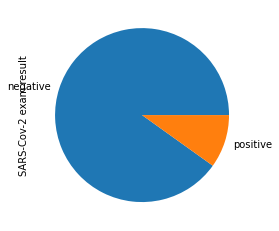

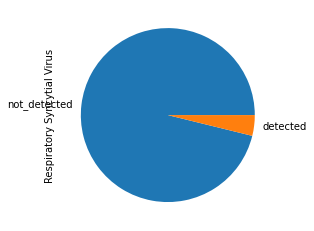

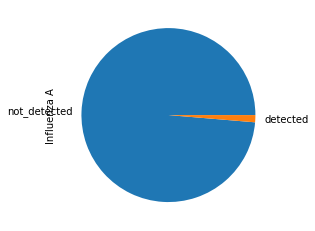

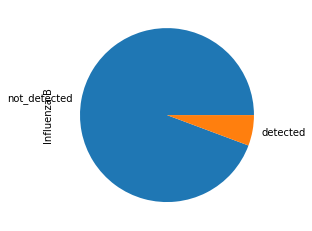

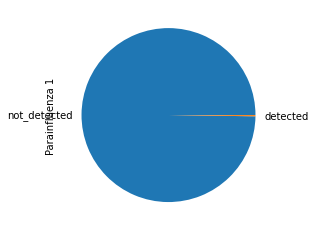

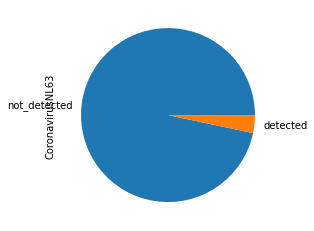

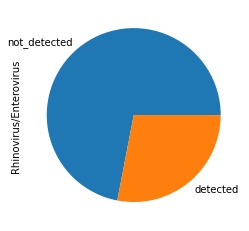

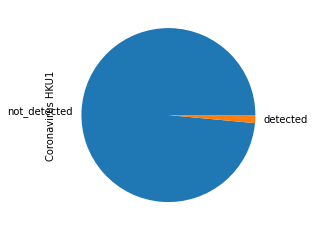

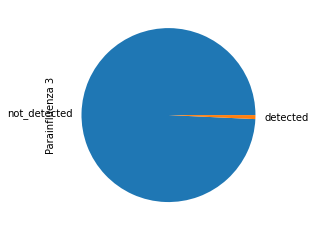

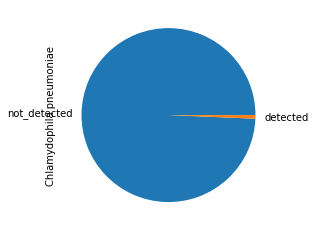

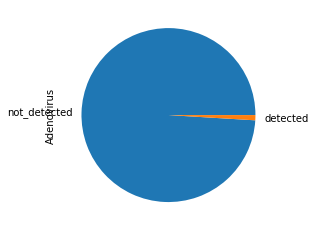

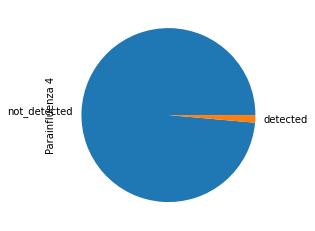

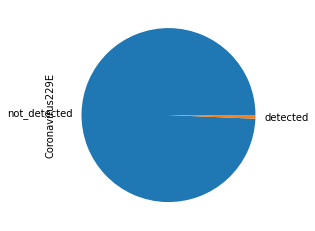

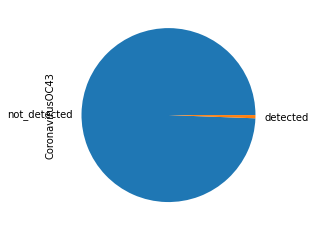

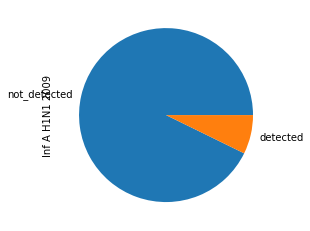

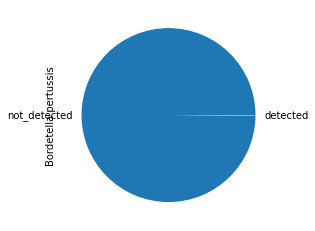

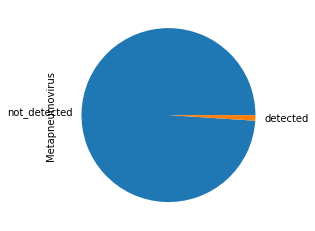

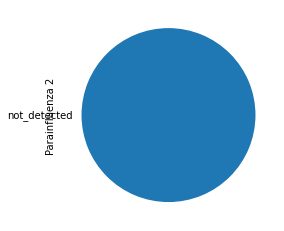

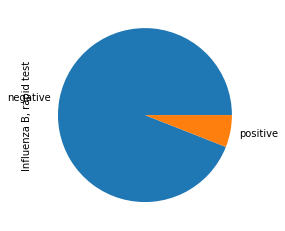

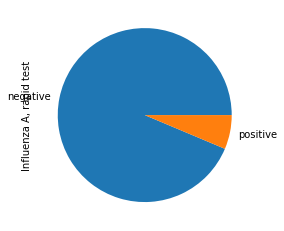

In [24]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [25]:
# Relation Target / variables
## création de sous-ensembles positifs et négatifs

In [26]:
positive_df = df[df['SARS-Cov-2 exam result']=='positive']

In [27]:
negative_df = df[df['SARS-Cov-2 exam result']=='negative']

 création des ensembles Blood et viral



In [28]:
missing_rate = df.isna().sum()/df.shape[0]

In [29]:
df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [30]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [31]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

Target / Blood

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

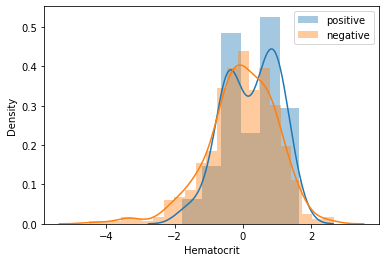

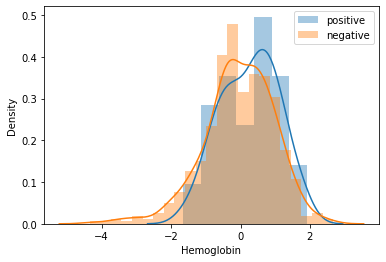

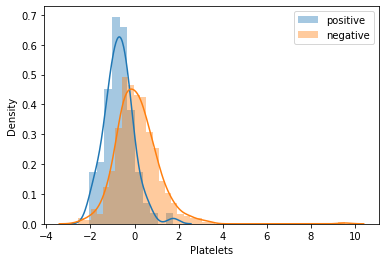

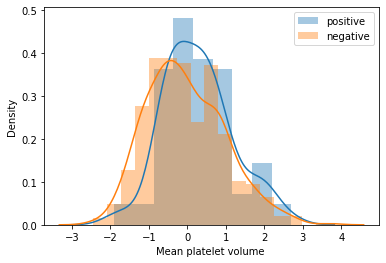

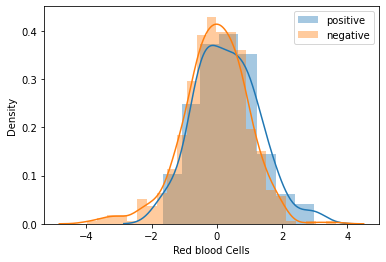

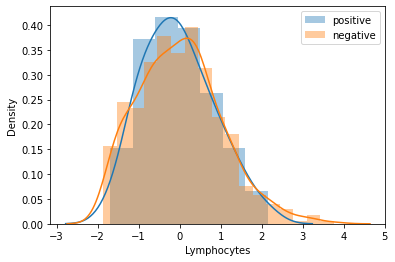

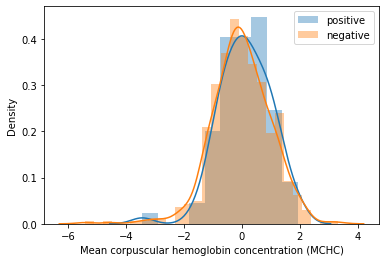

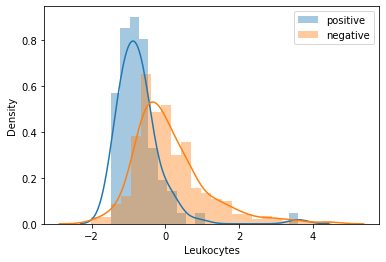

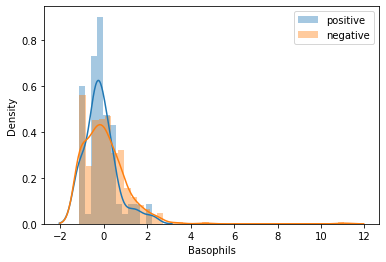

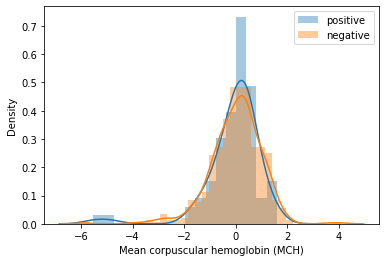

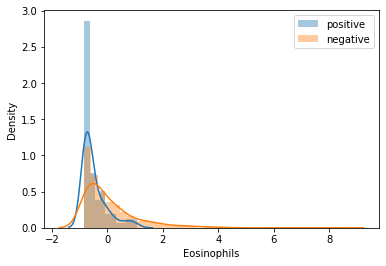

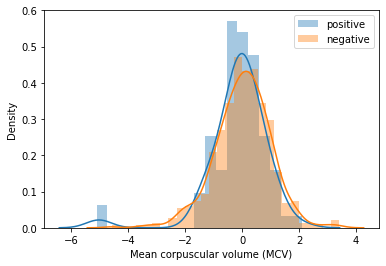

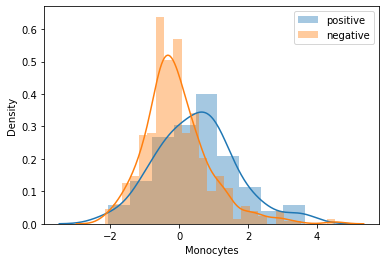

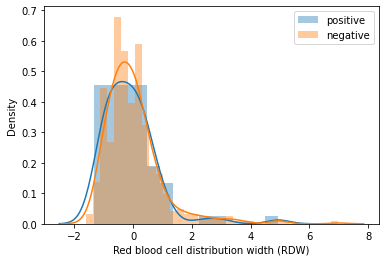

In [32]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

Relation Target/age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

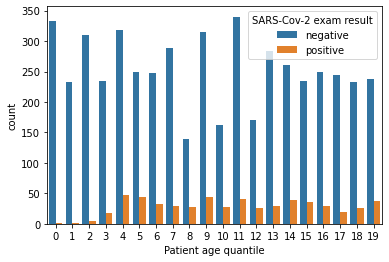

In [33]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result',data=df)

Relation target / viral

In [34]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

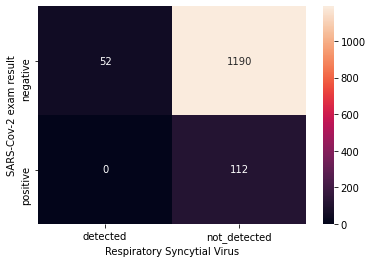

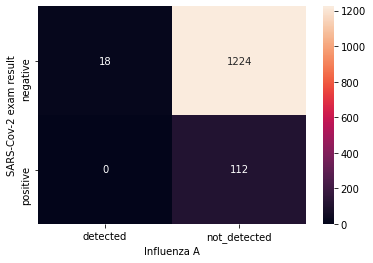

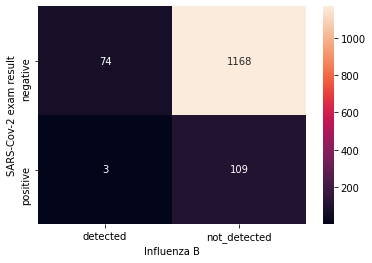

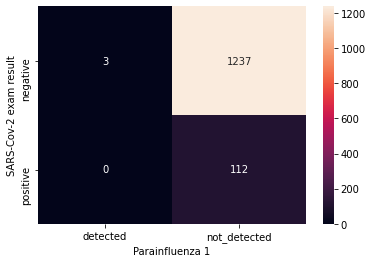

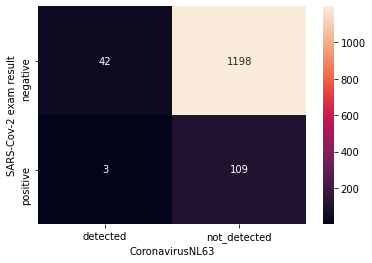

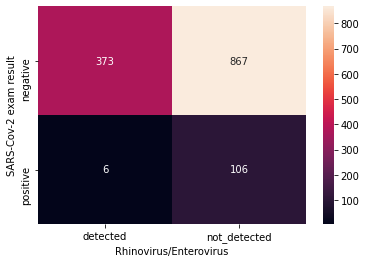

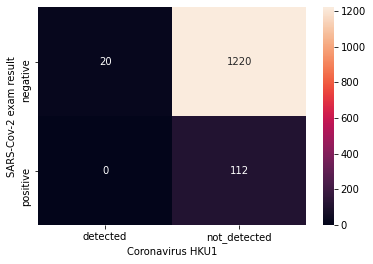

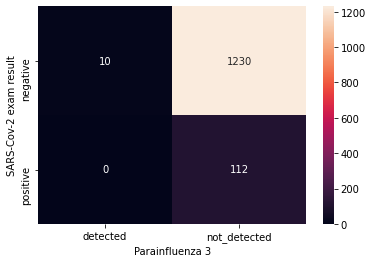

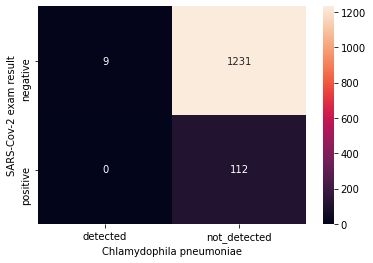

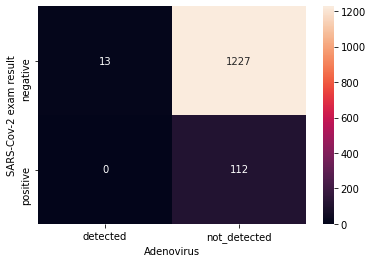

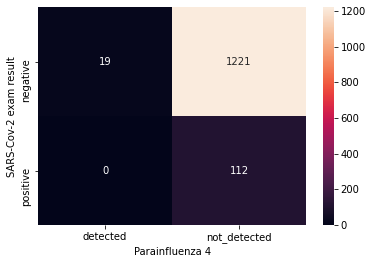

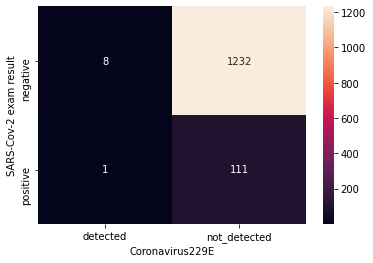

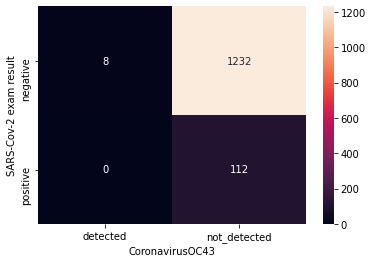

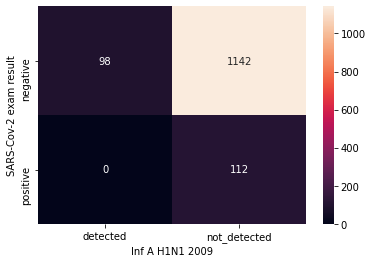

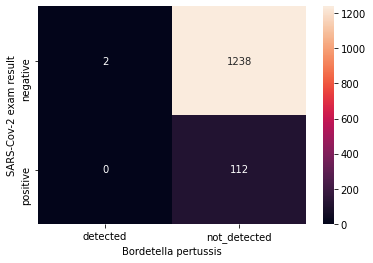

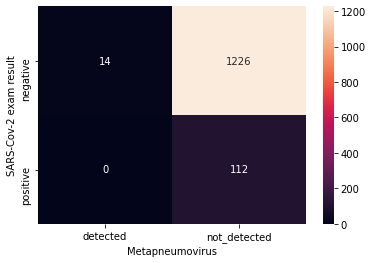

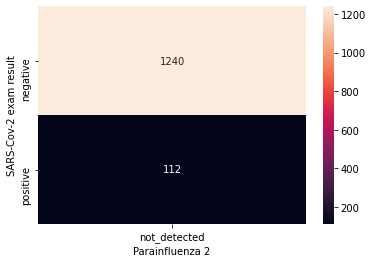

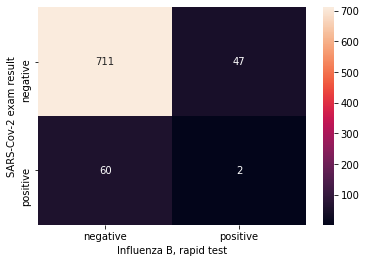

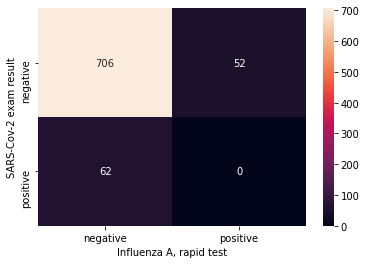

In [35]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

Analyse détaillée

# relation variables/variables
* blood_data/blood_data: certaines variables sont trés corrélées +0.9 (à surveiller)
*blood_data/age trés faible corr
*viral/viral influenza rapid test donne de mauvais résultat.
*maladie/blood_data
*hospitalisation/est malade
*hospitalisation/blood

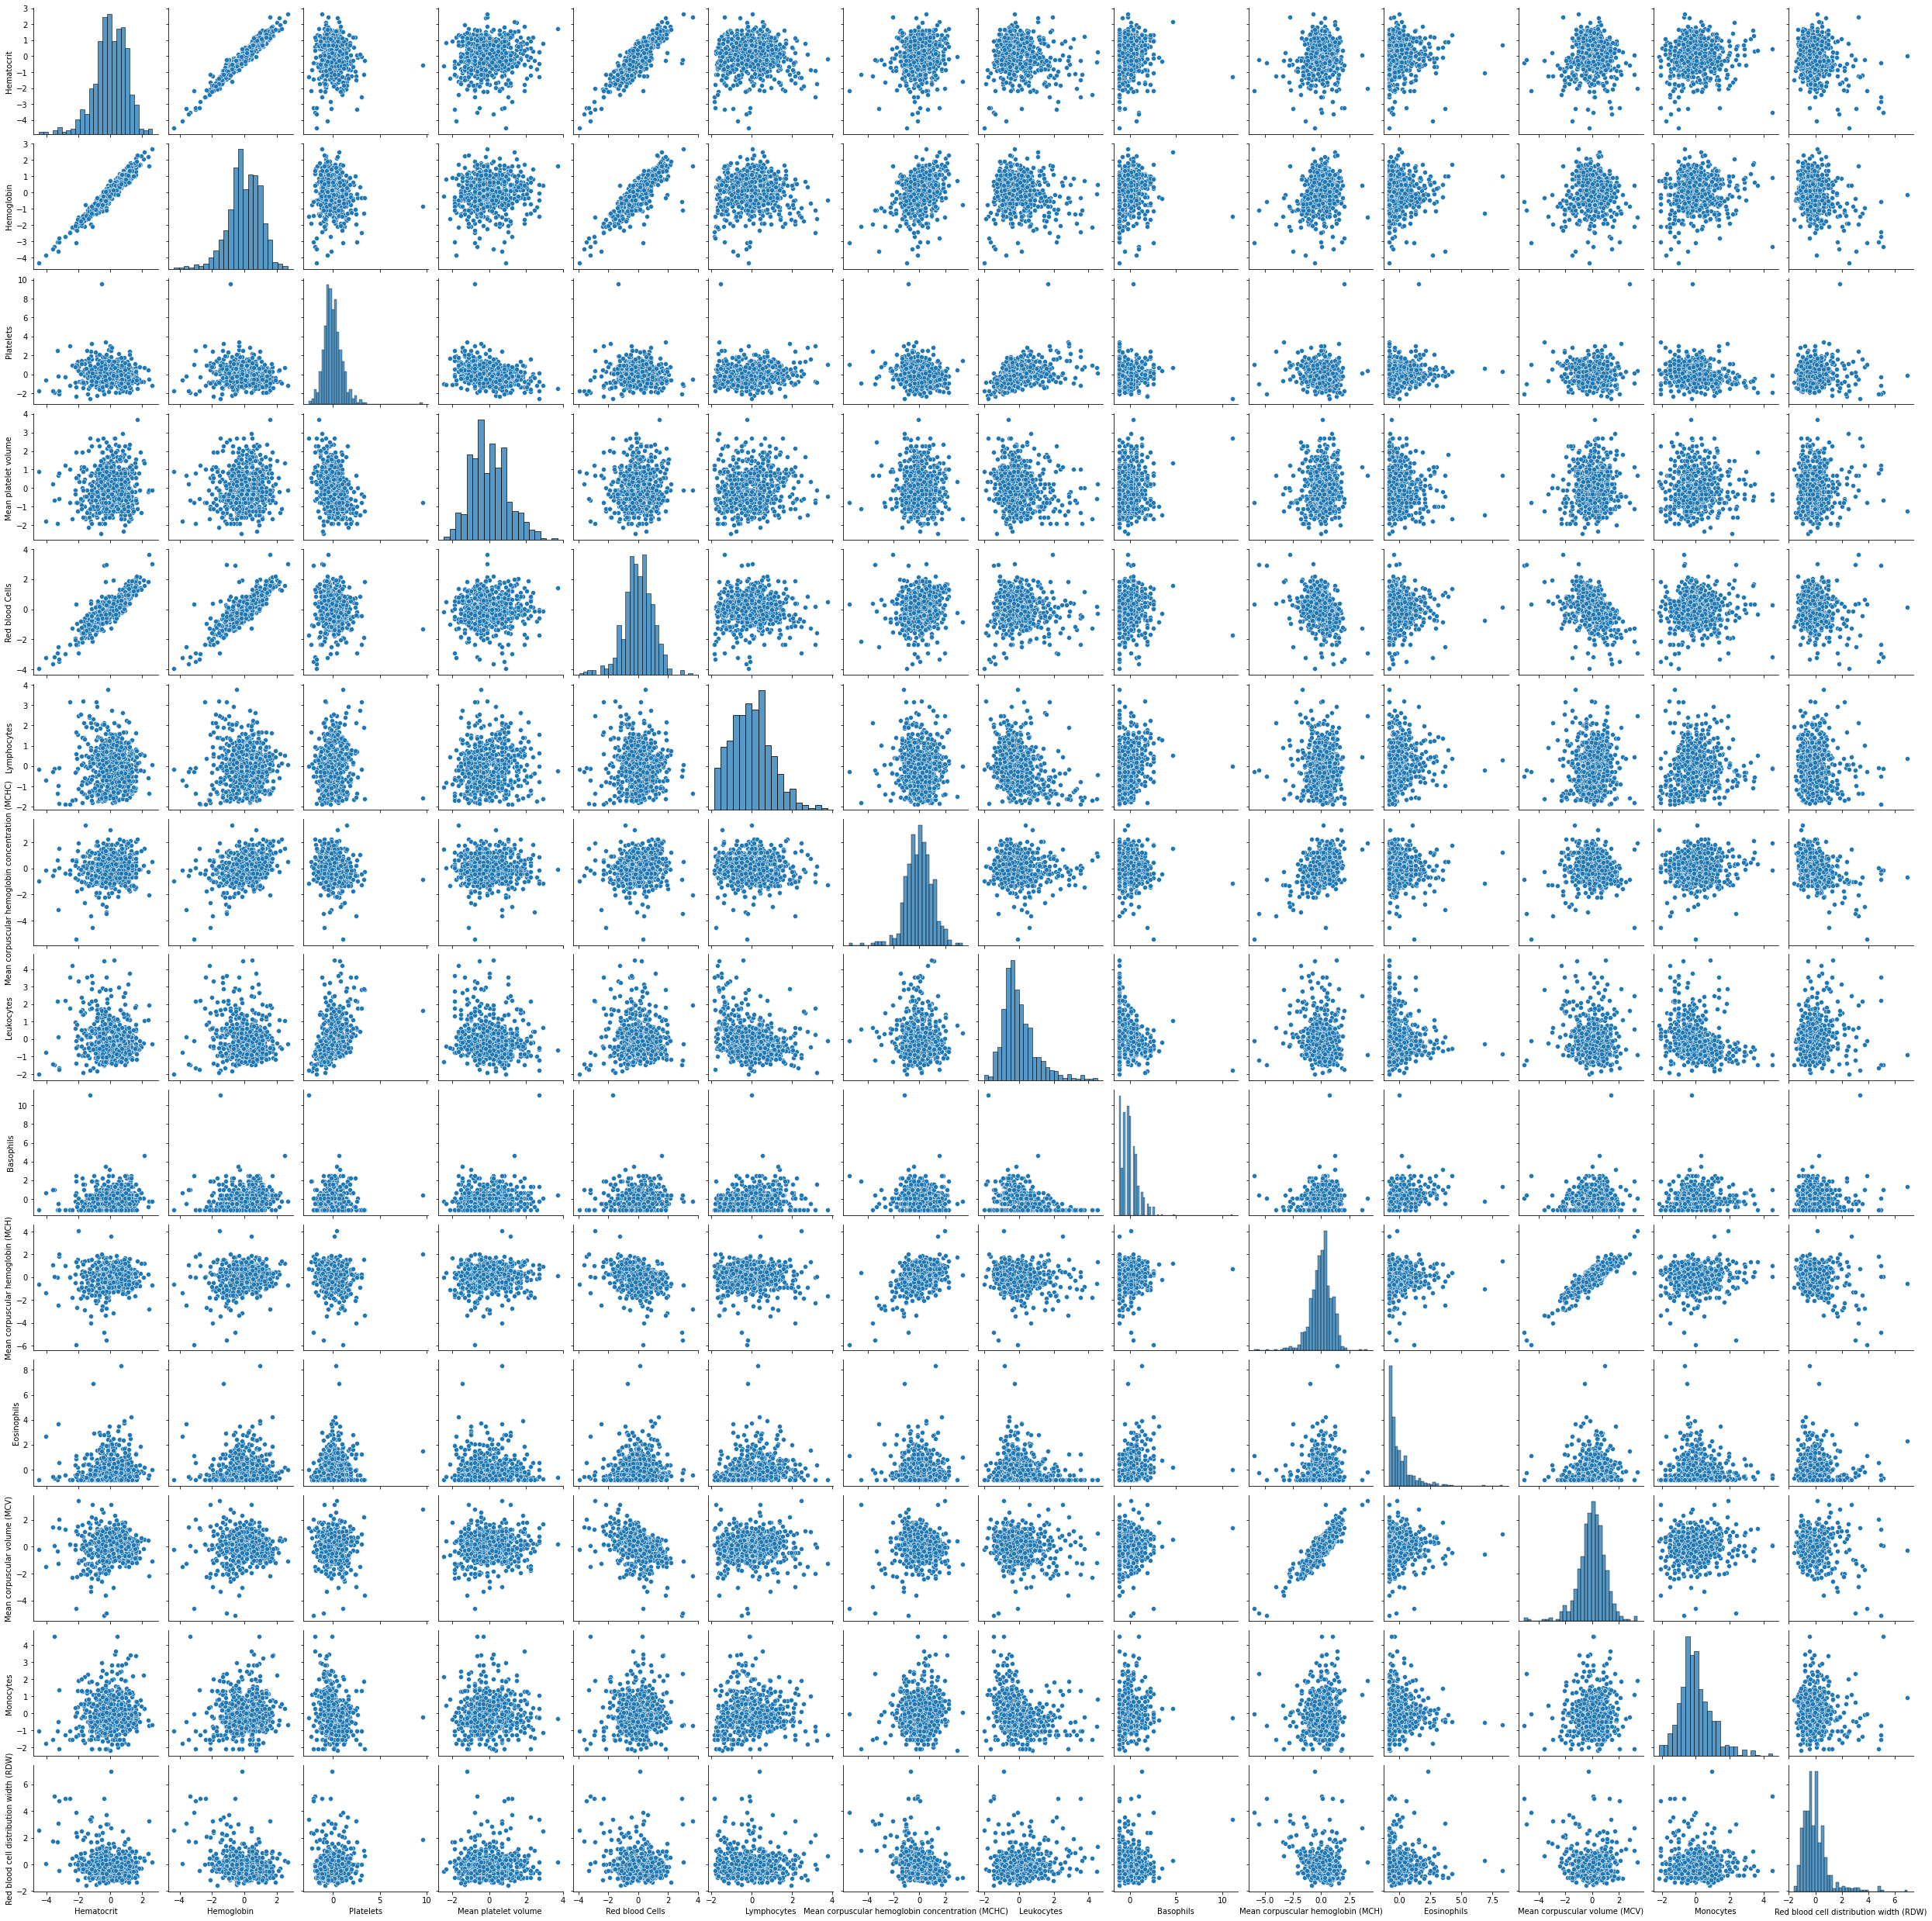

In [36]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

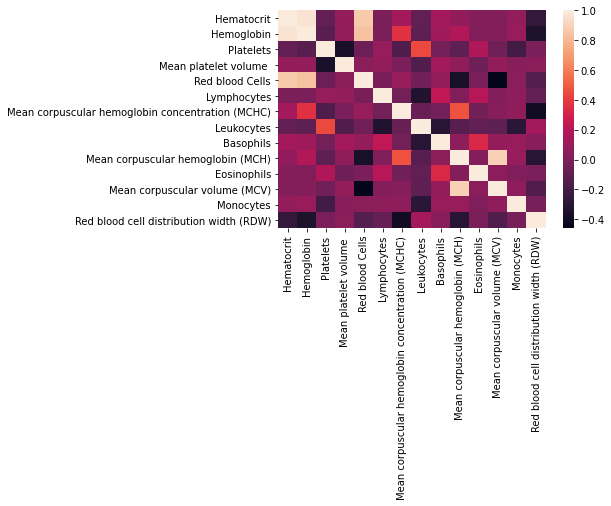

In [37]:
sns.heatmap(df[blood_columns].corr())

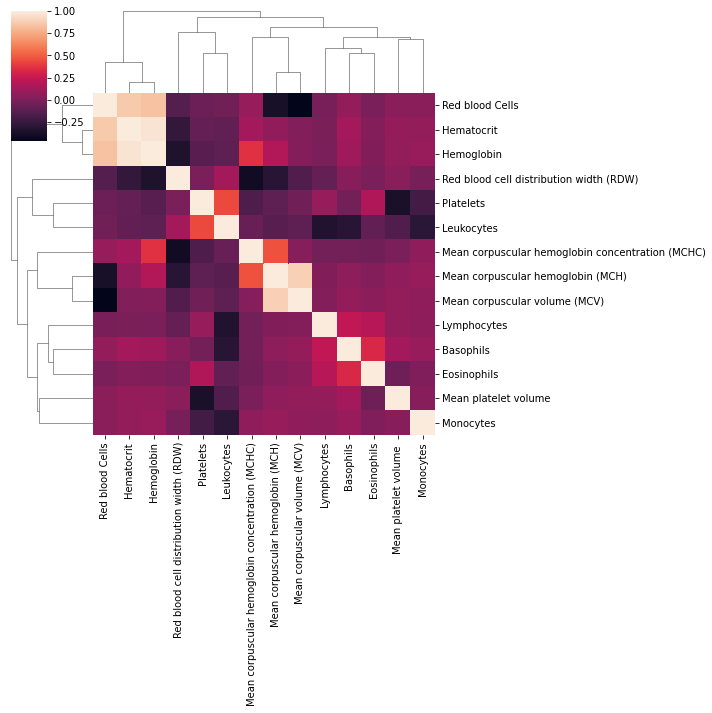

In [38]:
sns.clustermap(df[blood_columns].corr())

<ipython-input-39-999c1088f350>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

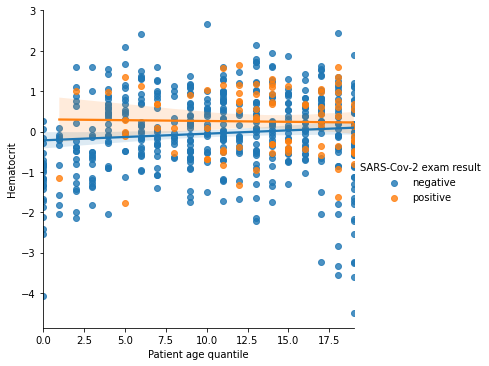

<Figure size 432x288 with 0 Axes>

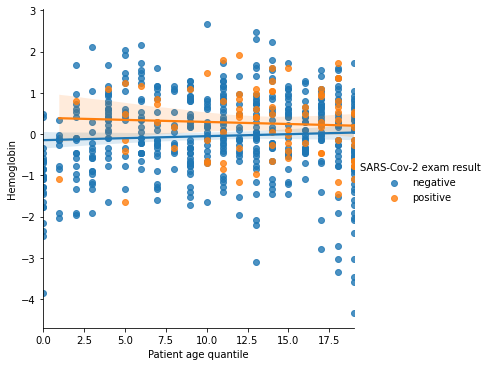

<Figure size 432x288 with 0 Axes>

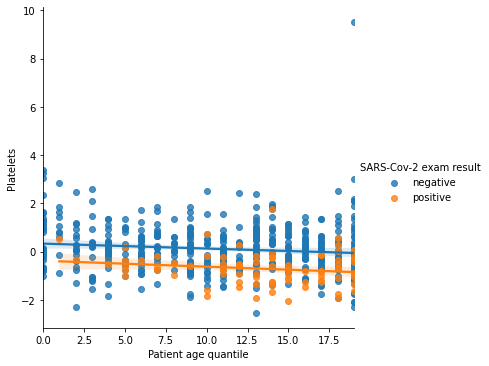

<Figure size 432x288 with 0 Axes>

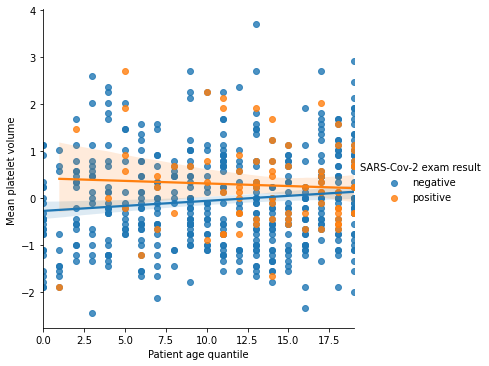

<Figure size 432x288 with 0 Axes>

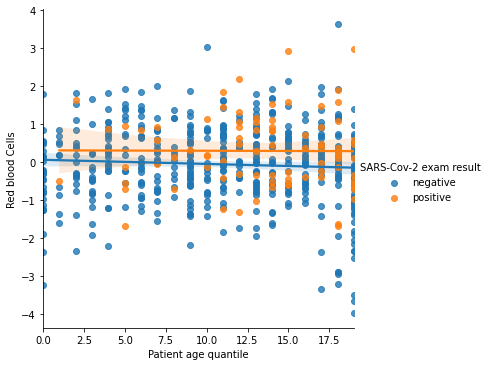

<Figure size 432x288 with 0 Axes>

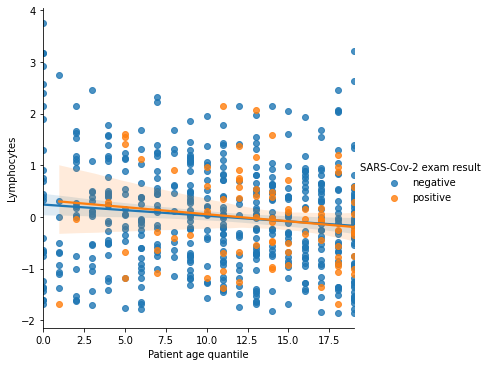

<Figure size 432x288 with 0 Axes>

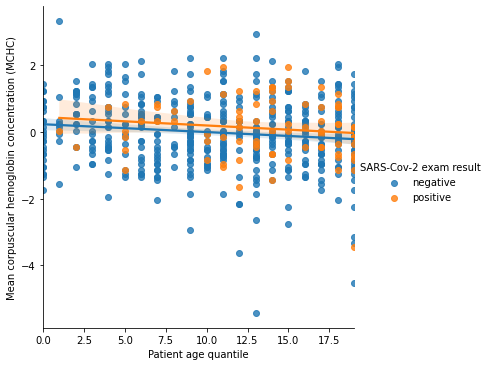

<Figure size 432x288 with 0 Axes>

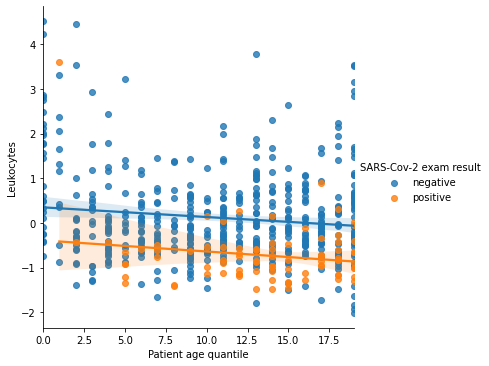

<Figure size 432x288 with 0 Axes>

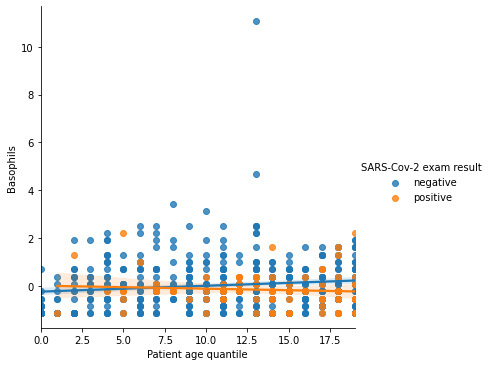

<Figure size 432x288 with 0 Axes>

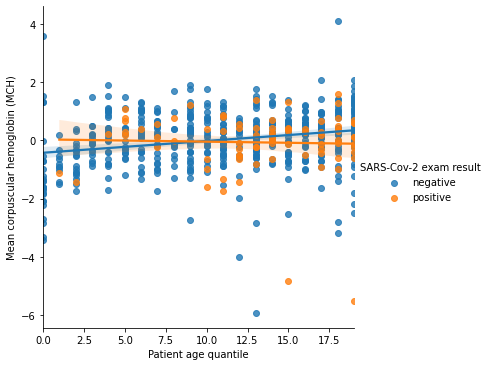

<Figure size 432x288 with 0 Axes>

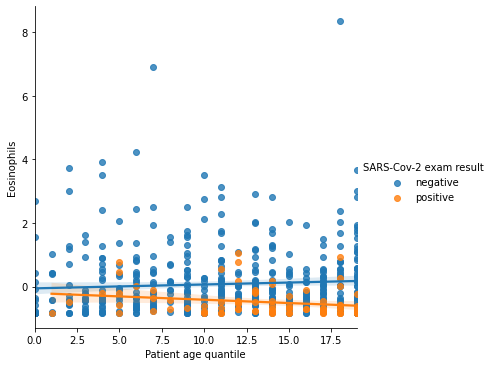

<Figure size 432x288 with 0 Axes>

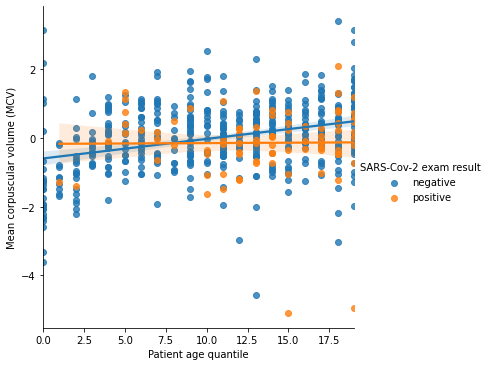

<Figure size 432x288 with 0 Axes>

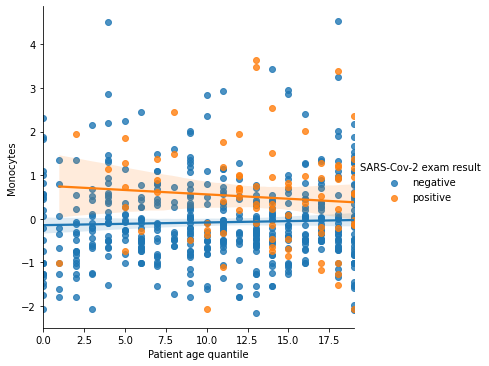

<Figure size 432x288 with 0 Axes>

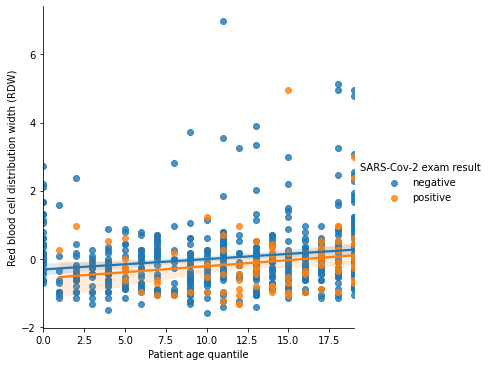

In [39]:
for col in blood_columns: # visualise les courbes de regression
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [40]:
df.corr()['Patient age quantile'].sort_values()



Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [41]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [42]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [43]:
# relation viral/sanguin
#création d'une nouvelle variable "est malade"

np.sum(df[viral_columns[:-2]]== 'detected', axis=1)

0       0
1       1
2       0
3       0
4       1
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Length: 5644, dtype: int64

<AxesSubplot:>

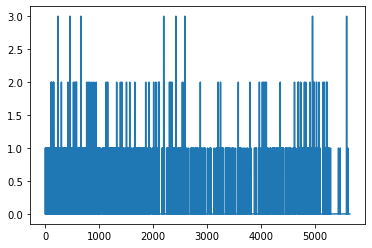

In [44]:
np.sum(df[viral_columns[:-2]]== 'detected', axis=1).plot()

# on voit qu'il y a qui ont été testés + à 3 maladies!

In [45]:
df['est malade'] = np.sum(df[viral_columns[:-2]]== 'detected', axis=1) >=1

In [46]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [47]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

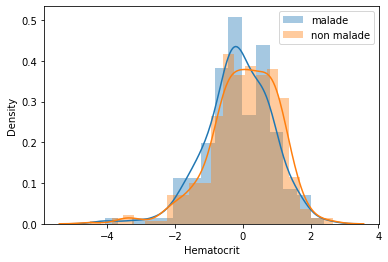

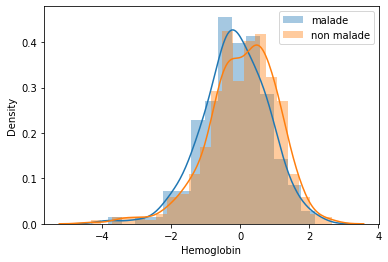

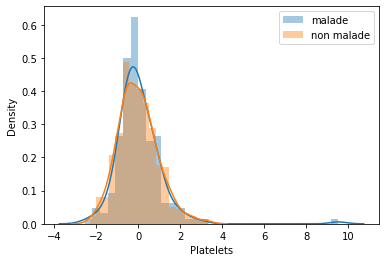

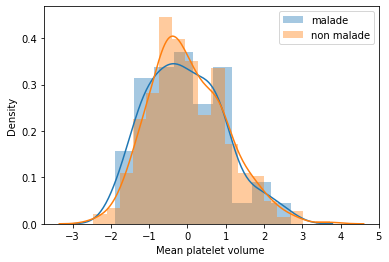

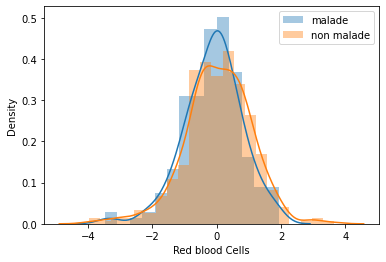

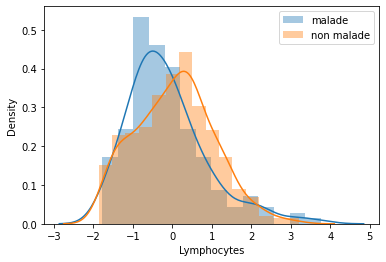

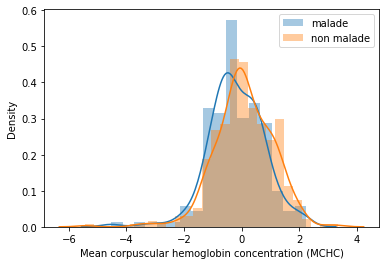

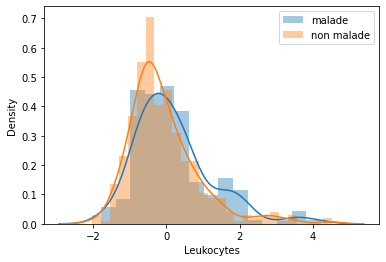

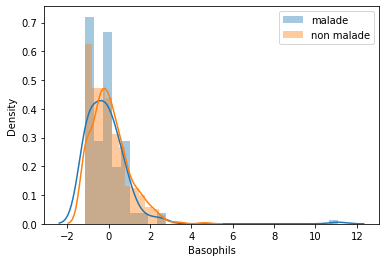

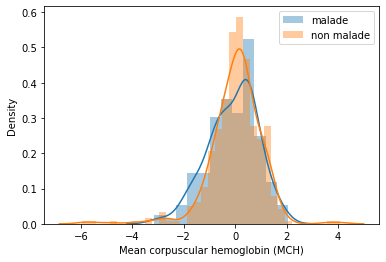

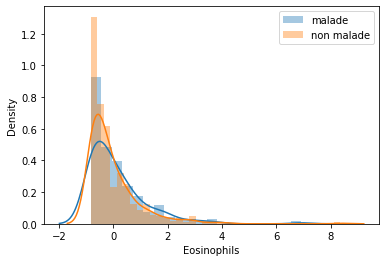

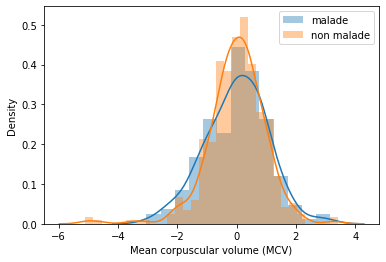

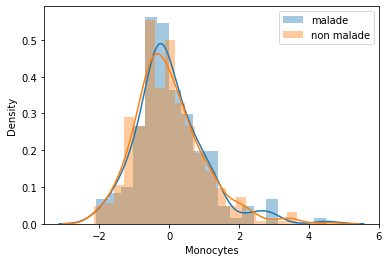

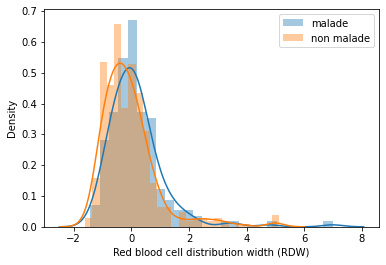

In [48]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

# Preprocessing

## Objectis:

1. Mettre les données dans un format propice au ML

     Train / Test
   
     Encodage
    
      Nettoyage des NaN

====> 1er modèle : Evaluation - Diagnostique


2. Améliorer la performance du modèle
   
   Feature Selection
   
   Feature Engineering
    
    Feature Scaling
    
    Suppression des outliers

In [49]:
# ON REPREND LE DATASET INITIAL
df = data.copy()
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [50]:
df.shape

(5644, 111)

In [51]:
missing_rate = df.isna().sum()/df.shape[0]

In [52]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [53]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.8) & (missing_rate > 0.75)])

In [54]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [55]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Parainfluenza 3  Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  \
0              NaN                       NaN           NaN              NaN   
1     not_detected              not_detected  not_detected     not_detected   
2              NaN                       NaN           NaN              NaN   
3              NaN                       NaN           NaN              NaN   
4     not_detected              not_detected  not_detected     not_detected   

   Coronavirus229E  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis  \
0              NaN              NaN             NaN                  NaN   
1     not_detected     not_detected    not_detected         not_detected   
2              NaN              NaN             NaN                  NaN   
3              NaN              NaN             NaN                  NaN   
4     not_detected     not_detected    not_detected         not_detected   

  Metapneumovirus Parainfluenza 2  
0             NaN             NaN  
1    not_detected    not_detected  
2             NaN             NaN  
3             NaN             NaN  
4    not_detected    not_detected  

[5 rows x 33 columns]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [58]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [59]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

# Encodage

In [60]:
code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}

In [61]:
for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)
    

In [62]:
df

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13                       0         NaN         NaN   
1                       17                       0    0.236515   -0.022340   
2                        8                       0         NaN         NaN   
3                        5                       0         NaN         NaN   
4                       15                       0         NaN         NaN   
...                    ...                     ...         ...         ...   
5639                     3                       1         NaN         NaN   
5640                    17                       0         NaN         NaN   
5641                     4                       0         NaN         NaN   
5642                    10                       0         NaN         NaN   
5643                    19                       1    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                                  NaN         NaN  ...   
1                                            -0.950790   -0.094610  ...   
2                                                  NaN         NaN  ...   
3                                                  NaN         NaN  ...   
4                                                  NaN         NaN  ...   
...                                                ...         ...  ...   
5639                                               NaN         NaN  ...   
5640                                               NaN         NaN  ...   
5641                                               NaN         NaN  ...   
5642                                               NaN         NaN  ...   
5643                                         -0.353319   -1.288428  ...   

      Parainfluenza 3  Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  \
0                 NaN                       NaN         NaN              NaN   
1                 0.0                       0.0         0.0              0.0   
2                 NaN                       NaN         NaN              NaN   
3                 NaN                       NaN         NaN              NaN   
4                 0.0                       0.0         0.0              0.0   
...               ...                       ...         ...              ...   
5639              NaN                       NaN         NaN              NaN   
5640              NaN                       NaN         NaN              NaN   
5641              NaN                       NaN         NaN              NaN   
5642              NaN                       NaN         NaN              NaN   
5643              NaN                       NaN         NaN              NaN   

      Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0                 NaN              NaN              NaN                   NaN   
1                 0.0              0.0              0.0                   0.0   
2                 NaN              NaN              NaN                   NaN   
3                 

In [63]:
df.dtypes.value_counts()

float64    31
int64       2
dtype: int64

# on voit qu'il n'y a plus variables de type object.

In [64]:
def encodage(df):
    code = {'positive':1,
       'negative':0,
       'detected':1,
       'not_detected':0}
    
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
    return df

In [65]:
def feature_engineering(df): #on crée une nouvelle variable
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df
    

In [66]:
def imputation(df):
    df = df.dropna(axis=0)
    #df['isna'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df.fillna(-999)
    return df

In [67]:
def preprocessing(df):
    
    df = encodage(df)
    feature_engineering(df)
    df = imputation(df)
    
    x = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return x, y

In [68]:
x_train, y_train = preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-64-956628ac43a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-65-df9bf127fea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1


In [69]:
x_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-64-956628ac43a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-65-df9bf127fea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_columns].sum(axis=1) >= 1


# Modelisation

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier(random_state=0)

# Procedure d'évaluation

In [72]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [73]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                              train_sizes=np.linspace(0.1, 1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='validation_score')
    plt.legend()

[[48  6]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.45      0.42      0.43        12

    accuracy                           0.80        66
   macro avg       0.66      0.65      0.66        66
weighted avg       0.80      0.80      0.80        66



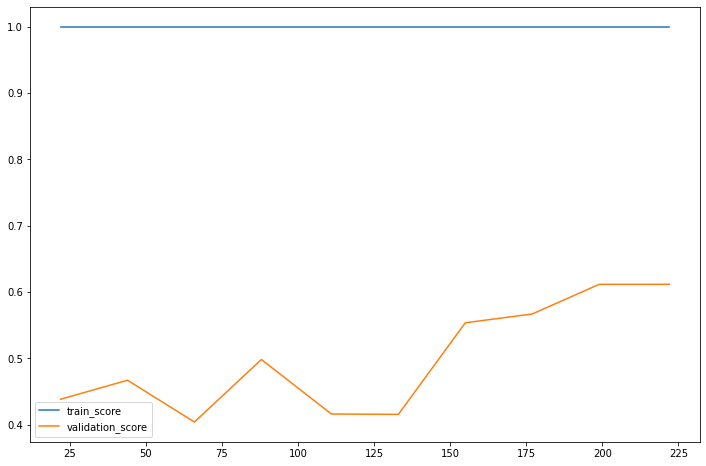

In [74]:
evaluation(model)

model en overfitting (score modele = 100% mais il incapable de généraliser à d'autre cas).

il faut augmenter les données. on remplace dropna() par fillna() dans la fonction imputation.

malheureusement le résultat est moins bon.

on essaie d'introduire une fonction. Pas d'amélioration. le fillna() ne marche pas. On utilise features importante

In [75]:
model.feature_importances_

array([0.02012784, 0.0077494 , 0.02012784, 0.08316652, 0.03396573,
       0.05513278, 0.00455041, 0.04850325, 0.22230193, 0.0932052 ,
       0.        , 0.06508593, 0.04679723, 0.05196643, 0.06137751,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18594201])

In [76]:
pd.DataFrame(model.feature_importances_, index=x_train.columns)

0
Patient age quantile                              0.020128
Hematocrit                                        0.007749
Hemoglobin                                        0.020128
Platelets                                         0.083167
Mean platelet volume                              0.033966
Red blood Cells                                   0.055133
Lymphocytes                                       0.004550
Mean corpuscular hemoglobin concentration (MCHC)  0.048503
Leukocytes                                        0.222302
Basophils                                         0.093205
Mean corpuscular hemoglobin (MCH)                 0.000000
Eosinophils                                       0.065086
Mean corpuscular volume (MCV)                     0.046797
Monocytes                                         0.051966
Red blood cell distribution width (RDW)           0.061378
Respiratory Syncytial Virus                       0.000000
Influenza A                                       0.000000
Influenza B                                       0.000000
Parainfluenza 1                                   0.000000
CoronavirusNL63                                   0.000000
Rhinovirus/Enterovirus                            0.000000
Coronavirus HKU1                                  0.000000
Parainfluenza 3                                   0.000000
Chlamydophila pneumoniae                          0.000000
Adenovirus                                        0.000000
Parainfluenza 4                                   0.000000
Coronavirus229E                                   0.000000
CoronavirusOC43                                   0.000000
Inf A H1N1 2009                                   0.000000
Bordetella pertussis                              0.000000
Metapneumovirus                                   0.000000
Parainfluenza 2                                   0.000000
est malade                                        0.185942

<AxesSubplot:>

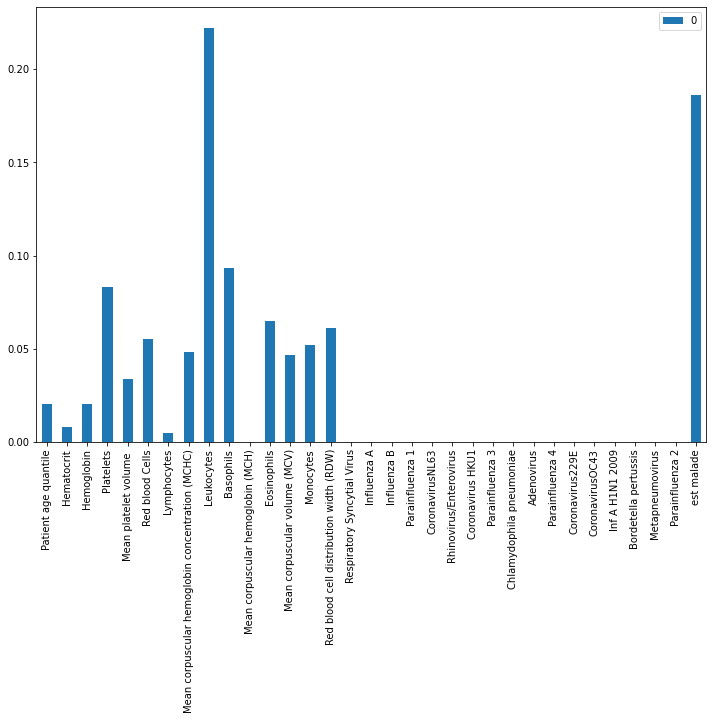

In [77]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(figsize=(12,8))

In [78]:
# on utilise le randomforestclassifier DecisionTreeClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model = RandomForestClassifier(random_state=0)

In [81]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [82]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                              train_sizes=np.linspace(0.1, 1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='validation_score')
    plt.legend()

[[54  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



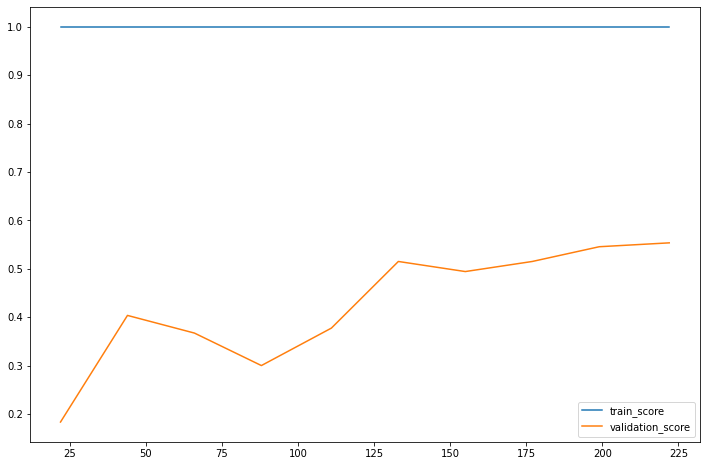

In [83]:
evaluation(model)